In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import numpy as np
import geopandas as gpd
import seaborn as sns
from shapely.geometry import Point, Polygon

In [51]:
world_map = gpd.read_file('../../data/geo_export_a285d42f-840b-490d-b7af-14c7e337d22c.shp')

In [52]:
fig, ax = plt.subplots(figsize=(192,108))
world_map.plot(ax=ax)

<Axes: >

In [53]:
# import ./data/meteorite_landings.csv
# header is row 0
df_meteorite_data = pd.read_csv('../../data/meteorite_landings.csv', header=0)
df_meteorite_data.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation  
0    6.08333     (50.775, 6.08333)  
1   10.23333  (56.18333, 10.23333)  
2 -113.00000    (54.21667, -113.0)  
3  -99.90000     (16.88333, -99.9)  
4  -64.95000   (-33.16667, -64.95)

In [54]:
def filter_meteorites(df, lat_range, long_range):
    filtered_df = df[
        (df['reclat'] >= lat_range[0]) & (df['reclat'] <= lat_range[1]) &
        (df['reclong'] >= long_range[0]) & (df['reclong'] <= long_range[1])
    ]
    return filtered_df

In [55]:
# Get user input for latitude and longitude ranges
lat_start = float(input("Enter the starting latitude: "))
lat_end = float(input("Enter the ending latitude: "))
long_start = float(input("Enter the starting longitude: "))
long_end = float(input("Enter the ending longitude: "))

# Define the latitude and longitude ranges
lat_range = (lat_start, lat_end)
long_range = (long_start, long_end)


Enter the starting latitude:  0
Enter the ending latitude:  90
Enter the starting longitude:  0
Enter the ending longitude:  180


In [56]:
filtered_data = filter_meteorites(df_meteorite_data, lat_range, long_range)

In [57]:
meteorite_coords = [Point(xy) 
            for xy in zip(filtered_data['reclong'],
                          filtered_data['reclat'])]

In [58]:
print(filtered_data)

                      name     id nametype              recclass  mass (g)  \
0                   Aachen      1    Valid                    L5      21.0   
1                   Aarhus      2    Valid                    H6     720.0   
5                 Adhi Kot    379    Valid                   EH4    4239.0   
6      Adzhi-Bogdo (stone)    390    Valid                 LL3-6     910.0   
7                     Agen    392    Valid                    H5   30000.0   
...                    ...    ...      ...                   ...       ...   
45710           Zillah 001  31355    Valid                    L6    1475.0   
45711           Zillah 002  31356    Valid               Eucrite     172.0   
45712               Zinder  30409    Valid  Pallasite, ungrouped      46.0   
45713                 Zlin  30410    Valid                    H4       3.3   
45714            Zubkovsky  31357    Valid                    L6    2167.0   

        fall    year    reclat   reclong           GeoLocation 

In [59]:
crs = {'init':'epsg:4326'}
geo_df_meteorites = gpd.GeoDataFrame(filtered_data, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=meteorite_coords) #specify the geometry list we created
geo_df_meteorites.head()

fig, ax = plt.subplots(figsize=(192,108))
world_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df_meteorites[geo_df_meteorites['fall'] == 'Found'].plot(
        ax=ax, 
        markersize=500, 
        color='red', 
        alpha=0.5,
        marker='o', 
        label='Found')
geo_df_meteorites[geo_df_meteorites['fall'] == 'Fell'].plot(
        ax=ax, 
        markersize=700, 
        color='blue', 
        alpha=0.5,
        marker='*', 
        label='Fell')


plt.legend(prop={'size':90})

C:\Users\jayod\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [60]:
# Define the number of bins for latitude and longitude
NUM_BINS = 20
lat_bins = np.linspace(lat_start, lat_end, num=NUM_BINS)
lon_bins = np.linspace(long_start, long_end, num=NUM_BINS)

# Bin the data
hist, xedges, yedges = np.histogram2d(
    filtered_data['reclat'],
    filtered_data['reclong'],
    bins=[lat_bins, lon_bins]
)

hist = hist[::-1, :] #flips the data for heatmap to match the 
#print(hist)
#print

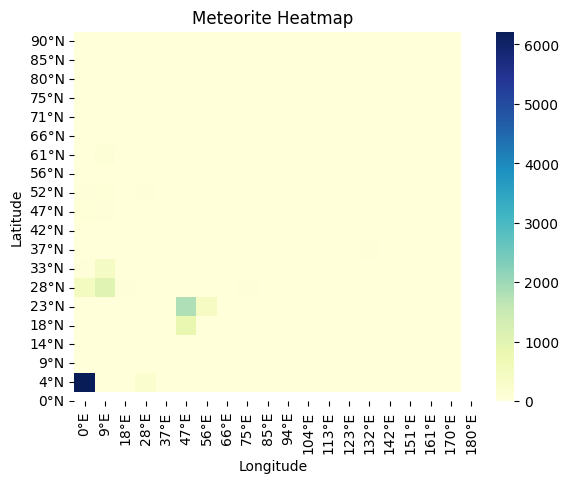

In [65]:
# Create a heatmap
#plt.figure(figsize=(10, 8))

sns.heatmap(
            hist, 
            cmap="YlGnBu", 
            xticklabels=[f'{int(val)}°E' for val in lon_bins], #grabs the labels from the bins
            yticklabels=[f'{int(val)}°N' for val in lat_bins[::-1]], #flips the order for the heatmap
            cbar=True
            )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Heatmap')
plt.show()